# IFT712 - Projet de fin de session
### Réalisé par: Ala Antabli (20012727)
Ce projet est fait dans le cadre du cours des techniques d'apprentissage (IFT712). Il porte sur la classification des feuilles des arbres en utilisant six méthodes de classification. Nous avons utilisé également la bibliothèque Sklearn. Le but est de comparer les différentes méthodes de classification afin de trouver le modèle adapté à l'étude des plantes. Pour cela, nous allons utiliser la validation croisée ainsi que la recherche d’hyperparamètres pour chaque classifieur.


In [55]:
'''
 Imporation des bibliothèque
'''
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import utils.utils as utils
from classifiers.LogisticRegressionClassifier import LogisticRegression_Classifier
from classifiers.DecisionTreeClassifier import DecisionTree_Classifier
from classifiers.SVMClassifier import SVM_Classifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)  # définir la taille par défaut des visualisations
%reload_ext autoreload
%autoreload 2

In [56]:
# Résultat pour la comparaison visuelle
dict_accuracy = {}

# Dictionnaire des étiquettes pour les prédictions de test et liste des fonctions de score
dict_prediction = {}
scorers = {"Accuracy": 'accuracy', "Precision": 'precision_micro', "F1": 'f1_micro'}


# 1. Préparation des données

Nous ntilisons les données des feuilles présentes dans Kaggle (https://www.kaggle.com/c/leaf-classification/data).
Nous avons un ensemble de données pour l'entrainement (train) et un pour les test (test).

Chaque ensemble possède :
- un id unique pour chaque feuille 
- 64 attributs de la marge
- 64 attributs de la forme 
- 64 attributs de la texture 

In [57]:
# Préparation de la base de données

# Données d'entrainement:
training_data = pd.read_csv("./data/train.csv")
training_data.set_index("id", inplace=True)
training_data.dropna(axis=0, inplace=True)

# Données de test:
testing_data = pd.read_csv("./data/test.csv")
testing_data.set_index("id", inplace=True)
testing_data.dropna(axis=0, inplace=True)

In [58]:
training_data

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


In [59]:
testing_data

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836


In [60]:
# Séparation des caractéristiques/cibles des données
# Données d'entrainement:
Y_training = training_data["species"]
X_training = training_data.drop(["species"], axis=1)

# Données de test (pas de colonne cible):
X_testing = testing_data.copy()

# Encodage "One-hot" pour les cibles d'entraînement
class_names = np.unique(Y_training)
labelBin = LabelBinarizer().fit(Y_training)

# Normalisation des données
# Données d'entrainement:
std = np.std(X_training, axis=0)
mean = np.mean(X_training, axis=0)
X_training = (X_training - mean) / std

# Données de test:
X_testing = (X_testing - mean) / std

# Fractionnement des données d'entraînement pour la validation
valid_perc = 0.3
X_training, X_valid, Y_training, Y_valid = train_test_split(X_training, Y_training, test_size=valid_perc, random_state=0, shuffle=True)

# Cibles encodage "one-hot"
Y_training_not_bin = Y_training.copy()
Y_training = labelBin.transform(Y_training)
Y_valid_not_bin = Y_valid.copy()
Y_valid = labelBin.transform(Y_valid)

# 2. Classification

Nous allons utiliser dans cette partie six méthodes de classification qui sont les suivantes:
- Regression logique
- Arbre de décision

## 2.1- Classification par regression logistique 
La régression logistique représente un algorithme d’apprentissage automatique que nous utilisons dans les problèmes de classification. Il a pour objectif d'attribuer nos observations à un ensemble de classes discret. Il représente un modèle linéaire. À l'aide de la fonction sigmoïde logistique, la régression logistique va transformer la sortie en une probabilité d'appartenance à une classe (1 ou bien 0 dans le cas binaire).

### 2.2.1- Entrainement
Nous entrainons maintenant notre modèle en utilisant les données sans recherche des hyper-paramètres.

In [45]:
model = LogisticRegression_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
accu_training, accu_valid = model.train_without_grid()

print('Précision dans l`entrainement: {:.3%}'.format(accu_training))
print('Précision dans la validation: {:.3%}'.format(accu_valid))

Précision dans l`entrainement: 100.000%
Précision dans la validation: 81.481%


### 2.1.2- Recherche hyper-paramètres

Nous cherchons les hyper-paramètres sur :
- `estimator__C` : L'inverse de la régularisation,
- `estimator__solver` :  Algorithme utilisé pour notre optimisation
- `estimator__penalty` : 'l2'

In [46]:
LogisticRegression_param = {
    'estimator__C': [100, 10, 1.0, 0.1, 0.01],
    'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'estimator__penalty': ['l2']
}


Nous cherchons par la suite les hyper-paramètres avec RandomizedSearch.

In [49]:
model = LogisticRegression_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
accu_training_hyperparm, accu_valid_hyperparm, best_estimator, best_accuracy = model.train(LogisticRegression_param, random_search=True)

print('Meilleure précision de validation croisée : {}'.format(best_accuracy))
print('\nMeilleur estimateur:\n{}'.format(best_estimator))

print('Précision de l`entrainement: {:.3%}'.format(accu_training_hyperparm))
print('Précision de la validation: {:.3%}'.format(accu_valid_hyperparm))

print("[Paramètres de l'estimateur]")
model.estimator.get_params()

Utilisation de la recherche aléatoire :
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleure précision de validation croisée : 0.8326243353143571

Meilleur estimateur:
MultiOutputClassifier(estimator=LogisticRegression(C=100), n_jobs=4)
[Estimator parameters]


{'estimator__C': 100,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=100),
 'n_jobs': 4}

Précision de l`entrainement: 100.000%
Précision de la validation: 86.532%


In [52]:
# Ajouter un pourcentage de précision pour une comparaison visuelle
dict_accuracy["Logistic Regression"] = accu_valid_hyperparm*100

### 2.1.3- Prédiction de test
Nous pouvons maintenant faire la prédiction pour les données de test.

In [56]:
LogisticReg_prediction = model.predict(X_testing)
LogisticReg_prediction_label = labelBin.inverse_transform(LogisticReg_prediction)

dict_prediction["Logistic regression"] = LogisticReg_prediction_label
df_prediction = pd.DataFrame.from_dict(dict_prediction)
df_prediction

,Logistic regression
0,Quercus_Agrifolia
1,Quercus_Afares
2,Acer_Circinatum
3,Castanea_Sativa
4,Alnus_Viridis
...,...
589,Acer_Circinatum
590,Alnus_Rubra
591,Quercus_Canariensis
592,Quercus_Phillyraeoides


### 2.1.4- Visualisation des courbes d'apprentissage
Nous affichons nos courbes d'apprentissage dans le cas où nous changeant un seul hyperparamètre par une recherche complète.

In [59]:
RegLog_param = {
    'estimator__C': range(1, 200, 10),
}
model = LogisticRegression_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
model.train(RegLog_param, random_search=False)

Utilisation de la recherche complète :
Fitting 5 folds for each of 20 candidates, totalling 100 fits


(1.0,
 0.8653198653198653,
 MultiOutputClassifier(estimator=LogisticRegression(C=121), n_jobs=4),
 0.8353664894171619)

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 121}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 131}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 141}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 151}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 161}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 171}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 181}

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.835 (std: 0.043)
Paraméters: {'estimator__C': 191}



precision      0.988506
recall         0.868687
f1-score       0.924731
support      297.000000
Name: micro avg, dtype: float64

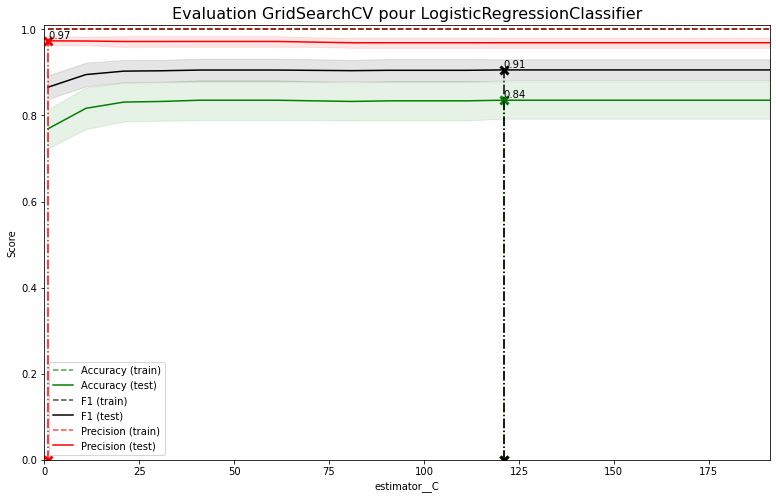

In [71]:
disp_RegLog = utils.Affichage(model)

disp_RegLog.best_estimators(TopN=2)

y_val_pred = model.predict(X_valid)
display(disp_RegLog.class_report(Y_valid, y_val_pred, mean_only=True))

disp_RegLog.plot(param_abscissa="estimator__C")

## 2.2- Classification par arbre de décision
Une arbre de décision représente une méthode d’apprentissage non paramétrique. C'est une méthode supervisée utilisée pour la classification et la régression. Nous voulons créer un modèle dans le but de prédir la valeur de la variable cible en apprenant des règles de décision à partir des données et leurs caractéristiques. On parle d'une approximation constante par segments.

### 2.2.1- Entrainement
Nous entrainons maintenant notre modèle en utilisant les données sans recherche des hyper-paramètres.

In [31]:
model = DecisionTree_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
accu_training, accu_valid = model.train_without_grid()

print('Précision de l`entrainement: {:.3%}'.format(accu_training))
print('Précision de la validation: {:.3%}'.format(accu_valid))

Précision de l`entrainement: 100.000%
Précision de la validation: 53.535%


### 2.2.2- Recherche hyper-paramètres
Nous cherchons les hyper-paramètres sur :
- `max_depth` : Profondeur maximale de notre arbre.
- `min_samples_split` : Le nbr minimal des échantillons pour la division d'un noeud interne.
- `criterion` : Une fonction de mesure de la qualité de division. 

In [34]:
DT_params = {
    'max_depth': [None, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 50000, 100000],
    'min_samples_leaf': list(range(2, 6)),
    'criterion': ['gini', 'entropy']
}

model = DecisionTree_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
accu_training_hyperparm, accu_valid_hyperparm, best_estimator, best_accuracy = model.train(DT_params, random_search=True)

print('\nMeilleure précision de validation croisée : {}'.format(best_accuracy))
print('\nMeilleur estimateur:\n{}'.format(best_estimator))

print('\nPrécision de l`entrainement: {:.3%}'.format(accu_training_hyperparm))
print('Précision de la validation: {:.3%}'.format(accu_valid_hyperparm))

print("\n[Paramètres de l'estimateur]")
model.estimator.get_params()

Utilisation de la recherche aléatoire :
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Meilleure précision de validation croisée : 0.549775831508706

Meilleur estimateur:
DecisionTreeClassifier(criterion='entropy', max_depth=10000, min_samples_leaf=2)

Précision de l`entrainement: 94.661%
Précision de la validation: 54.545%

[Paramètres de l'estimateur]


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10000,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
# Nous ajouton par la suite un pourcentage de précision pour avoir une comparaison visuelle
dict_accuracy["Arbre de décision"] = accu_valid_hyperparm*100

### 2.2.3 - Prédiction de test
Nous pouvons donc faire une prédiction des classes pour les données de test.

In [39]:
DT_pred = model.predict(X_testing)
DT_pred_label = labelBin.inverse_transform(DT_pred)

dict_prediction["Arbre de décision"] = DT_pred_label
df_prediction = pd.DataFrame.from_dict(dict_prediction)
df_prediction

,Decision tree,Arbre de décision
0,Quercus_Greggii,Quercus_Greggii
1,Castanea_Sativa,Castanea_Sativa
2,Acer_Circinatum,Acer_Circinatum
3,Populus_Grandidentata,Populus_Grandidentata
4,Acer_Rufinerve,Acer_Rufinerve
...,...,...
589,Acer_Circinatum,Acer_Circinatum
590,Alnus_Rubra,Alnus_Rubra
591,Quercus_Canariensis,Quercus_Canariensis
592,Viburnum_Tinus,Viburnum_Tinus


### 2.2.4-  Visualisation des courbes d'apprentissage
Nous affichons nos courbes d'apprentissage dans le cas où nous changeant un seul hyperparamètre par une recherche complète.

In [42]:
DT_params = {
    'max_depth': range(1, 1000, 10),
}
model = DecisionTree_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
model.train(DT_params, random_search=False)

Utilisation de la recherche complète :
Fitting 5 folds for each of 100 candidates, totalling 500 fits


(1.0,
 0.5286195286195287,
 DecisionTreeClassifier(max_depth=591),
 0.5484308205609425)

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.548 (std: 0.048)
Paraméters: {'max_depth': 591}

Modèle avec rang: 2
Validation moyenne: Accuracy: 0.547 (std: 0.044)
Paraméters: {'max_depth': 961}



precision      0.52862
recall         0.52862
f1-score       0.52862
support      297.00000
Name: micro avg, dtype: float64

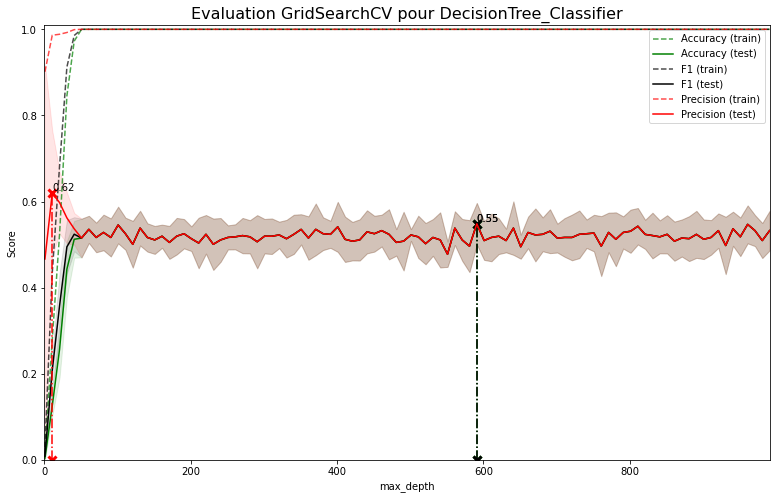

In [43]:
disp_DT = utils.Affichage(model)

disp_DT.best_estimators(TopN=2)

y_valid_pred = model.predict(X_valid)
display(disp_DT.class_report(Y_valid, y_valid_pred, mean_only=True))

disp_DT.plot(param_abscissa="max_depth")

## 2.3- Classification par SVM

Les SVM (machines à vecteurs support) représentent des algorithmes d’apprentissage supervisés. Elle sont utilisées pour faire la classification et la régression. Leur principe est basé souvent sur les noyaux qui sont utilisés pour permettre la transformation de l’espace de représentation des données d’entrées en un espace de plus grande dimension. Dans ce dernier espace, nous trouverons une séparation linéaire, ce qui permet de maximiser la distance entre les différents groupes de nos données.
### 2.3.1- Entrainement
Nous entrainons maintenant notre modèle en utilisant les données sans recherche des hyper-paramètres.

In [46]:
model = SVM_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
accu_training, accu_valid = model.train_without_grid()

print('Accuracy train: {:.3%}'.format(accu_training))
print('Accuracy validation: {:.3%}'.format(accu_valid))

Accuracy train: 88.745%
Accuracy validation: 60.269%


### 2.3.2- Recherche hyper-paramètres
Nous d'hyper-paramètres sur :
- `estimator__C` : Chaque point de données mal classéaura une pénalité
- `estimator__kernel` : Choisir les noyaux
- `estimator__gamma` :  Ce paramètre est utilisé pour les hyperplans qui ne sont pas linéaires. La machine va essayer plus de faire un ajustement exacte sur l'ensemble des données d'apprentissage s'il est grand.

In [48]:
SVM_params = {'estimator__C': [0.1, 1, 100, 1000],
             'estimator__kernel': ['rbf', 'poly', 'sigmoid'],
             'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model = SVM_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
accu_training_hyperparm, accu_valid_hyperparm, best_estimator, best_accuracy = model.train(SVM_params, random_search=True)

print('\nMeilleure précision de validation croisée : {}'.format(best_accuracy))
print('\nMeilleur estimateur:\n{}'.format(best_estimator))

print('\nPrécision de l`entrainement: {:.3%}'.format(accu_training_hyperparm))
print('Précision de la validation: {:.3%}'.format(accu_valid_hyperparm))

print("\n[Paramètres de l'estimateur]")
model.estimator.get_params()

Utilisation de la recherche aléatoire :
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Meilleure précision de validation croisée : 0.9350641226149516

Meilleur estimateur:
MultiOutputClassifier(estimator=SVC(C=1000, gamma=0.001, probability=True),
                      n_jobs=4)

Précision de l`entrainement: 100.000%
Précision de la validation: 92.929%

[Paramètres de l'estimateur]


{'estimator__C': 1000,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 0.001,
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1000, gamma=0.001, probability=True),
 'n_jobs': 4}

In [49]:
# Nous ajouton par la suite un pourcentage de précision pour avoir une comparaison visuelle
dict_accuracy["SVM"] = accu_valid_hyperparm*100

### 2.3.3- Prédiction de test
Nous pouvons donc faire une prédiction des classes pour les données de test.

In [51]:
svm_predict = model.predict(X_testing)
svm_predict_label = labelBin.inverse_transform(svm_predict)

dict_prediction["SVM"] = svm_predict_label
df_prediction = pd.DataFrame.from_dict(dict_prediction)
df_prediction

,Decision tree,Arbre de décision,SVM
0,Quercus_Greggii,Quercus_Greggii,Quercus_Agrifolia
1,Castanea_Sativa,Castanea_Sativa,Quercus_Afares
2,Acer_Circinatum,Acer_Circinatum,Acer_Circinatum
3,Populus_Grandidentata,Populus_Grandidentata,Castanea_Sativa
4,Acer_Rufinerve,Acer_Rufinerve,Alnus_Viridis
...,...,...,...
589,Acer_Circinatum,Acer_Circinatum,Acer_Circinatum
590,Alnus_Rubra,Alnus_Rubra,Alnus_Rubra
591,Quercus_Canariensis,Quercus_Canariensis,Quercus_Canariensis
592,Viburnum_Tinus,Viburnum_Tinus,Quercus_Phillyraeoides


### 2.3.4- Visualisation des courbes d'apprentissage
Nous affichons nos courbes d'apprentissage dans le cas où nous changeant un seul hyperparamètre par une recherche complète.

In [61]:
SVM_params = {
    'estimator__gamma': [0.00001, 0.0001, 0.001, 0.004, 0.007, 0.01, 0.02, 0.05]
}
model = SVM_Classifier(X_training, Y_training, X_valid, Y_valid, class_names, scorers)
model.train(SVM_params, random_search=False)

Utilisation de la recherche complète :
Fitting 5 folds for each of 8 candidates, totalling 40 fits


(0.9884559884559885,
 0.7171717171717171,
 MultiOutputClassifier(estimator=SVC(gamma=0.01, probability=True), n_jobs=4),
 0.6521843394849338)

Modèle avec rang: 1
Validation moyenne: Accuracy: 0.652 (std: 0.042)
Paraméters: {'estimator__gamma': 0.01}

Modèle avec rang: 2
Validation moyenne: Accuracy: 0.594 (std: 0.048)
Paraméters: {'estimator__gamma': 0.007}



precision      1.000000
recall         0.717172
f1-score       0.835294
support      297.000000
Name: micro avg, dtype: float64

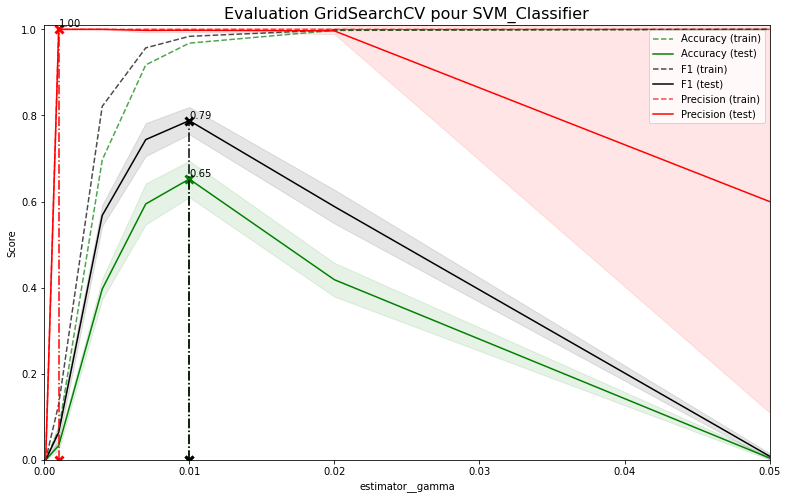

In [62]:
disp_SVM = utils.Affichage(model)
disp_SVM.best_estimators(TopN=2)

y_valid_pred = model.predict(X_valid)
display(disp_SVM.class_report(Y_valid, y_valid_pred, mean_only=True))

disp_SVM.plot(param_abscissa="estimator__gamma")